# Assignment 1.1: Exploring WS and BA models


## Part 1 - Study of the Watts-Stogatz(WS) Models

### Question related to the given reading material for part 1 (Network Science Chapter 3, Section 3.5 - 3.10, with emphasis on 3.8 and 3.9.)

**Question 1:** *What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*

**Answer 1:** The argument near the end of section 3.5 is that the random network model underestimates the size and frequency of both high- and low-degree nodes. This is illustrated in Image 3.6, where the random network peaks at $<k>$, while in real life the probability is higher at the beginning (i.e., for low-degree nodes) and extends further into the tail (i.e., for high-degree nodes).

In more practical terms, as described in the chapter, this means that in a random network model there are neither highly popular individuals nor people with very few connections. This is not reflective of reality, as the chapter notes with examples such as U.S. President Franklin Delano Roosevelt.

**Question 2:** *List the four regimes that characterize random networks as a function of  ⟨k⟩*

**Answer 2:** The four regimes which characterizes random networks as a function of ⟨k⟩ are:
1. The Subcritical Regime
2. The Critical Point
3. The Supercritical Regime
4. The Connected Regime

The subcritical regime consist of many small components, since there are not that many links formed, and it is not quite possible to determine a component to be the giant component.

The critical point explains the point which separates the subcritical regime from the supercritical regime. Most nodes are still located in numerous small components, however clusters of different sizes coexists. 

The supercritical regime explains the stage where one giant component is designated, while some nodes still exists in smaller components. This stage will last until all the smaller components are absorbed by the giant component, and by then the network will become a connected regime. 


**Question 3** *According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k) decreases as a function of  k in real-world networks?*

**Answer 3** It becomes a problem because degree-depending clustering C(k) is as explained by its name, dependent on the degree, hence a function of k in real-life networks, where the clustering in random networks is dependent on the size of the system. 


### WS edition


In [1]:
# Import necessary libraries (networkx for creating the small network and using built-in function for their properties, numpy for calculating statistical properties, and matplotlib for plotting)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Using the Watts-Strogatz model to generate graphs and analyze their properties, such as average shortest path length. 
# watts_strogatz_graph is given as watts_strogatz_graph(n=The number of nodes, k, p=probability of rewiring each edge)
graph_1 = nx.watts_strogatz_graph(500, 4, 0)
graph_2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph_3 = nx.watts_strogatz_graph(500, 4, 1)

# Calculate average shortest path length for each graph, given the built-in function average_shortest_path_length.
avg_path_length_g1 = nx.average_shortest_path_length(graph_1)
avg_path_length_g2 = nx.average_shortest_path_length(graph_2)
avg_path_length_g3 = nx.average_shortest_path_length(graph_3)

#Print the results
print(f"Average shortest path length for p=0: {avg_path_length_g1}")
print(f"Average shortest path length for p=0.1: {avg_path_length_g2}")
print(f"Average shortest path length for p=1: {avg_path_length_g3}")

Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 7.569050100200401
Average shortest path length for p=1: 4.759943887775551


When p goes towards 1, it can be seen that the network becomes more intertwined, and hence the shortest path lengths becomes shorter. 

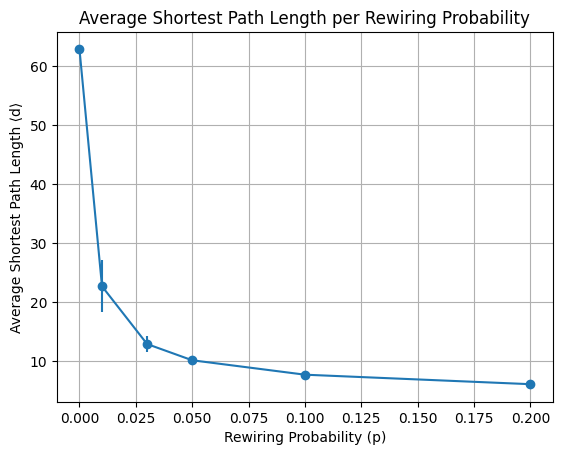

In [2]:
# To support the conclusion, we can plot the average shortest path length as a function of the rewiring probability p.
# We will calculate the average shortest path length for different values of p, and plot the results

# Define rewiring probabilities to test
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

# Store average shortest path lengths and their standard deviations
avg_path_lengths = []
std_dev_path_lengths = []

# For each p, generate multiple graphs, calculate their average shortest path lengths, and compute the mean and standard deviation
for p in p_values:
    #path_lengths for current p
    path_lengths = []
    
    #inner loop to average out the randomness, generating 50 graphs for each p
    for _ in range(50):
        graph = nx.watts_strogatz_graph(500, 4, p)
        path_length = nx.average_shortest_path_length(graph)
        path_lengths.append(path_length)

    # Calculate mean and standard deviation for current p
    avg_path_lengths.append(np.mean(path_lengths))
    std_dev_path_lengths.append(np.std(path_lengths))

# Plotting the results with error bars
plt.errorbar(p_values, avg_path_lengths, yerr=std_dev_path_lengths, fmt='-o')

#Add labels and title
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length per Rewiring Probability')
plt.grid(True)
plt.show()


**Figure Caption:** Average shortest path length ⟨d⟩ as a function of the rewiring probability 𝑝 in Watts–Strogatz networks with 𝑁=500 nodes and average degree ⟨𝑘⟩=4. Each data point represents the mean ⟨d⟩ over 50 independently generated networks, with error bars showing the standard deviation. The results demonstrate that even a very small amount of rewiring (e.g., 𝑝≈0.01) leads to a significant decrease in path length. The decrease is especially steep at the beginning, after which the reduction slows down and ⟨d⟩ gradually approaches the short paths characteristic of a fully randomized network.



## Part 2 - Study of the and Barabasi-Albert(BA) Models

**Question 1** *What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one)*

**Answer 1:** The three slope dependent regimes of complex networks with power-law degree distributions are:
1. Anomalous Regime $(y \leq 2)$
2. Scale-Free Regime $(2 < y < 3)$
3. Random Network Regime $(y > 3)$

where y determines the degree exponent.

In the Anomalous Regime the exponent, $1/(y− 1)$, will be greater than one, hence the networks size increases slower than the number of links connected to the largest hub. This means that for a network of a sufficient large N, the hub will run out of nodes to connect to, hence large-scale networks in the Anomalous regime cannot exists if they lack multi-links.

Networks in the Scale-Free Regime are ultra-small world networks. As the network grows kmax will grow as well, but with an exponent smaller than 1, since for $2 < y < 3$, it will be such that $1< 1/(y− 1) \leq 1/2$.

It is hard to distinguish the properties of scale free networks in the random network regime from the properties of a random network of similar size. The average distance between the nodes converges to the small-world formula derived for random networks.

**Question 2:** *What are the three regimes we find in non-linear preferential attachment? (chapter 5) Briefly describe each one.* 

**Answer 2:** The three regimes found in the non-linear preferential attachment are:
1. Sublinear Regime $(0 < \alpha < 1)$
2. Linear Regime  $(\alpha =1)$
3. Superlinear Regime $(\alpha  > 1)$

In the sublinear regime the degree distribution of the network follows the stretched exponential, hence the network consists of fewer and smaller hubs than a scale free network, and is better described as a random network. This happens due to the fact that $0 < \alpha$ results in new nodes favoring the more connected nodes, however since $\alpha  < 1$ the bias between the different nodes is weak. 

The linear regimes determines the regime where the Preferential Attachment is given as $\alpha  = 1$, which corresponds to the Barabási-Albert model, hence the degree distribution follows a power law. 

In the Superlinear Regime $(\alpha  > 1)$, the growth of the network follows a winner-takes-all dynamic or rich gets richer process. The bias of the nodes with many connection is weighted highly, and a new node is more likely to choose this node. Hence in this regime the firsts node to occur in the system will become super hubs, and all other nodes will link to these. 

The next section will be the group following *"the recipe for success"*, building a Barabasi-Albert model.

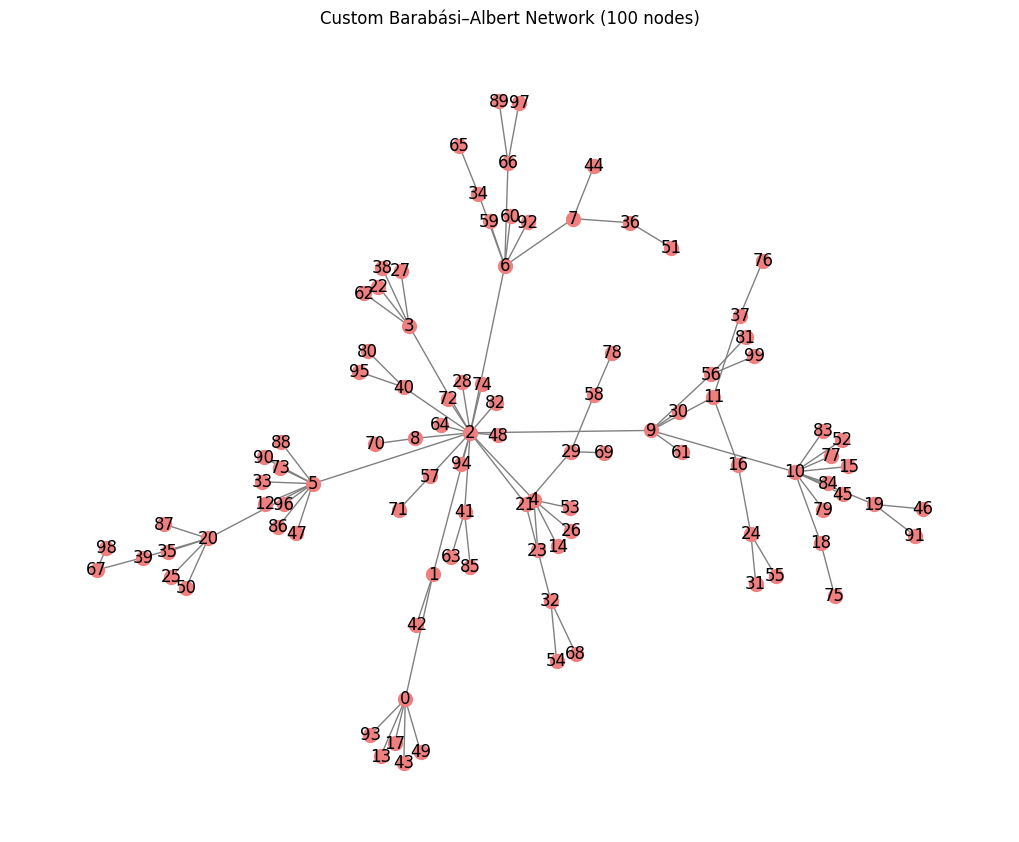

In [3]:
import random

# First create a graph consisting of a single link.
G = nx.Graph()
G.add_edge(0, 1)

# Grow the network to 100 nodes, one at a time
while len(G.nodes) < 100:
    new_node = len(G.nodes)
    
    # Flatten the edge list to get nodes proportional to degree
    edge_list = list(G.edges())
    flattened = [node for edge in edge_list for node in edge]
    
    # Choose one node to connect to, based on degree
    target_node = random.choice(flattened)
    
    # Add the new node and connect it
    G.add_edge(new_node, target_node)

# Then plot the network
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=100, node_color='lightCoral', edge_color='gray')
plt.title("Custom Barabási–Albert Network (100 nodes)")
plt.show()


Max degree: 147
Min degree: 1


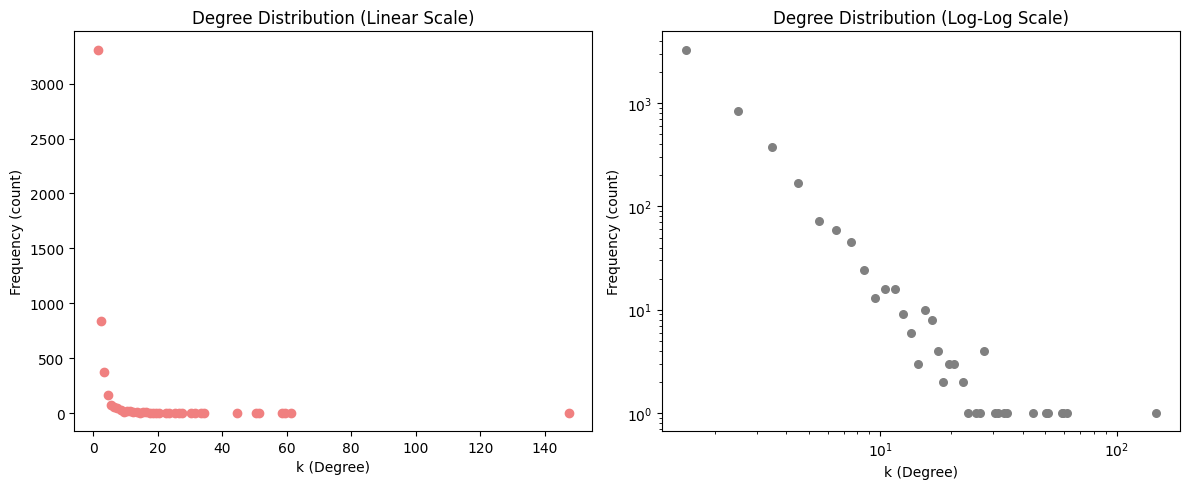

In [4]:
# Now it is time to grow the network to 5000 nodes
while len(G.nodes) < 5000:
    new_node = len(G.nodes)
    
    # Flatten the edge list to get nodes proportional to degree
    edge_list = list(G.edges())
    flattened = [node for edge in edge_list for node in edge]
    
    # Choose one node to connect to, based on degree
    target_node = random.choice(flattened)
    
    # Add the new node and connect it
    G.add_edge(new_node, target_node)

# Now the network contains 5000 nodes. With the new network, the  maximum and minimum degree is calculated.
# Gets the degrees of all nodes
degrees = [deg for _, deg in G.degree()] 

# Find max and min degree
max_degree = max(degrees)
min_degree = min(degrees)

# Print the results
print(f"Max degree: {max_degree}")
print(f"Min degree: {min_degree}")

# Then the degrees distribution is getting into bins using numpy.histogram.
# Bin the degree distribution
counts, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Filter out zero counts for log-log plot (step made as of begugging)
nonzero_indices = counts > 0
bin_centers = bin_centers[nonzero_indices]
counts = counts[nonzero_indices]

#Plot of the distribution, with both linear and log-log axes.

# Plot: Linear scale 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(bin_centers, counts, color='lightCoral')
plt.title("Degree Distribution (Linear Scale)")
plt.xlabel("k (Degree)")
plt.ylabel("Frequency (count)")

# Plot: Log-log scale 
plt.subplot(1, 2, 2)
plt.scatter(bin_centers, counts, color='gray', s=30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k (Degree)")
plt.ylabel("Frequency (count)")
plt.title("Degree Distribution (Log-Log Scale)")
plt.tight_layout()
plt.show()


# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

In [1]:
#Import relevant libraries
import urllib.request
import json
import re
import os
import time
import networkx as nx

In [2]:
# set the parameters (like in the video)
baseurl   = "https://en.wikipedia.org/w/api.php?"
action    = "action=query"
#title     = "titles=Aerosmith"   # <--- for testing purposes
title     = "titles=List_of_mainstream_rock_performers"
content   = "prop=revisions&rvprop=content&rvslots=main"
datafmt   = "format=json"

# construct the query (string formatting like in the video)
query = "%s%s&%s&%s&%s" % (baseurl, action, title, content, datafmt)


headers = {"User-Agent": "Mozilla/5.0"}
req = urllib.request.Request(query, headers=headers)

with urllib.request.urlopen(req) as response:
    data = json.loads(response.read().decode("utf-8"))

pages = data["query"]["pages"]
page  = next(iter(pages.values()))

rev   = page["revisions"][0]

# Debugging criteria, as the wikitext  wikitext content can appear in two formats (old/new API)
if "*" in rev:
    wikitext = rev["*"]
else:
    wikitext = rev["slots"]["main"]["*"]

    

In [3]:
#  apply regex to find all wiki-links 
pattern = r'\[\[([^\]|#]+)(?:\|([^\]]+))?\]\]'
pairs   = re.findall(pattern, wikitext)

#  clean up the names (skip categories etc.) 
names = []
seen  = set()

for target, display in pairs:
    if ":" in target:            # skip Category:, File:, Template:
        continue
    name = display or target     # use display text if present
    if name not in seen:
        seen.add(name)
        names.append(name)

print(len(names), "performer names found")


490 performer names found


In [7]:
# Make sure the output folder exists
outdir = "performers"
os.makedirs(outdir, exist_ok=True)

# Keep a list of saved filenames
saved_files = []

# Loop over all names/bands/artists
for name in names:
    #  Build the Wikipedia title 
    title_raw = name.replace(" ", "_")            # underscores instead of spaces
    title_enc = urllib.parse.quote(title_raw)     # URL encode special chars

    # Change a input in the API query string
    title     = "titles=" + title_enc
    query     = "%s%s&%s&%s&%s" % (baseurl, action, title, content, datafmt)

    #  Fetch the data from Wikipedia using new query
    headers = {"User-Agent": "Mozilla/5.0"}
    req = urllib.request.Request(query, headers=headers)

    with urllib.request.urlopen(req) as response:
        data = json.loads(response.read().decode("utf-8"))

    #  Extract the wikitext 
    pages = data["query"]["pages"]
    page  = next(iter(pages.values()))
    rev   = page["revisions"][0]
    if "*" in rev:
        wikitext = rev["*"]
    else:
        wikitext = rev["slots"]["main"]["*"]
    
    #  Sanitize the filename (replace /, :, etc.) 
    safe_filename = re.sub(r'[\\/*?:"<>|]', "_", title_raw)
    filepath = os.path.join(outdir, safe_filename + ".txt")

    #  Save the file (wikitext already fetched in earlier cells)
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(wikitext)

    print("Saved:", filepath)
    saved_files.append(filepath)   # remember the file

# Print summary
print("\nTotal files saved:", len(saved_files))
print("First few:", saved_files[:5])


Saved: performers/rock_music.txt
Saved: performers/10cc.txt
Saved: performers/10_Years.txt
Saved: performers/3_Doors_Down.txt
Saved: performers/311.txt
Saved: performers/.38_Special.txt
Saved: performers/ABBA.txt
Saved: performers/Accept.txt
Saved: performers/AC_DC.txt
Saved: performers/Bryan_Adams.txt
Saved: performers/Aerosmith.txt
Saved: performers/AFI.txt
Saved: performers/Air_Supply.txt
Saved: performers/The_Alan_Parsons_Project.txt
Saved: performers/Alice_in_Chains.txt
Saved: performers/The_All-American_Rejects.txt
Saved: performers/The_Allman_Brothers_Band.txt
Saved: performers/Alter_Bridge.txt
Saved: performers/Ambrosia.txt
Saved: performers/America.txt
Saved: performers/The_Animals.txt
Saved: performers/Adam_Ant.txt
Saved: performers/Anthrax.txt
Saved: performers/April_Wine.txt
Saved: performers/Arcade_Fire.txt
Saved: performers/Arctic_Monkeys.txt
Saved: performers/Asia.txt
Saved: performers/Audioslave.txt
Saved: performers/Avenged_Sevenfold.txt
Saved: performers/Awolnation.tx

In [8]:
# Extract all performer names from the saved files in the "performers" directory
files = [f for f in os.listdir(outdir) if f.endswith(".txt")]
performers = [f[:-4] for f in files]
performer_set = set(performers)

# Make a directed graph and add all nodes up-front
G = nx.DiGraph()
G.add_nodes_from(performers)

# Print some stats, to ensure all artist have been added
print("nodes in graph:", G.number_of_nodes())


nodes in graph: 490


Now it is time to create the network and add negihbours to each artist. This is done be looping trough each artist, opening their related file and then extracting the neighbors. Afterwards, for each link, neighbor, then the name of the neighbors is extracted. Then to ensure that we only add

In [9]:
# regex to capture the target part of [[Target]] or [[Target|Display]]
link_pattern       = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'  # [[Target]] or [[Target|Display]]

edge_count = 0

for file in files:
    # node id (same as filename stem)
    source = file[:-4]                         
    path   = os.path.join(outdir, file)

    # read saved wikitext
    with open(path, "r", encoding="utf-8") as f:
        wikitext = f.read()

    # store length of content as node attribute
    G.nodes[source]["word_count"] = len(wikitext)

    # link extraction
    links = re.findall(link_pattern, wikitext)
    neighbors = []
    # for each neighbors
    for t in links:
        t = t.strip()                  # clean whitespace
        if ":" in t:                   # skip namespaces
            continue
        t = t.replace(" ", "_")        # match saved filename convention
        t_safe = re.sub(r'[\\/*?:"<>|]', "_", t)  # same sanitization as when saving
        
        # keep only links that point to another performer (and not self-loops)
        if t_safe in performer_set and t_safe != source:
            neighbors.append(t_safe)
            G.add_edge(source, t_safe)
            edge_count += 1

print("done. nodes:", G.number_of_nodes(), "| edges:", G.number_of_edges(), "(added:", edge_count, ")")


done. nodes: 490 | edges: 5437 (added: 7878 )


In [10]:
# Remove isolated nodes (nodes with no edges)
print("Isolated nodes before:", nx.number_of_isolates(G))

# print total numer of nodes (conformation that the code will do as intended)
print("Total nodes before removing isolates:", G.number_of_nodes())

# Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))
print("Total nodes after removing isolates:", G.number_of_nodes())



Isolated nodes before: 93
Total nodes before removing isolates: 490
Total nodes after removing isolates: 397


In [ ]:
# use weakly connected components to extract the largest component
giant_nodes = max(nx.weakly_connected_components(G), key=len)

# Keep only the largest component, copy() preserves node/edge attributes
G = G.subgraph(giant_nodes).copy()

print("Largest component → Nodes:", G.number_of_nodes(), "| Edges:", G.number_of_edges())

Largest component → Nodes: 397 | Edges: 5437


In [12]:
# Create a file to upload to Github
nx.write_gexf(G, "rock_bands.gexf")